In [21]:
import pandas as pd
from find_shortest_path import get_path
from build_data import build_data
from numpy import median
from tqdm import tqdm
import random
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Random seed
random.seed(42)
# Seaborn theme
sns.set_theme(style="whitegrid")

In [8]:
stations_lst = pd.read_csv('./london/underground_stations.csv')['name'].unique()
# Make a combination set of stations
combinations = []
for i in range(len(stations_lst)):
    for j in range(i+1, len(stations_lst)):
        combinations.append((stations_lst[i], stations_lst[j]))
print("length of combination list:", len(combinations))

# Randomly 200 pairs of stations
combinations = list(combinations)
random.shuffle(combinations)
combinations = combinations[:200]

# Get the map
stations, underground_lines = build_data()

length of combination list: 46665


In [9]:
def random_test(algorithm, heuristic, alpha=1):
    distance_lst = []
    closize_lst = []

    for combination in tqdm(combinations):
        path, distance, closize = get_path(combination[0], combination[1], stations, algorithm, heuristic, alpha)
        if path is None:
            print("No path found")
        else:
            distance_lst.append(distance)
            closize_lst.append(closize)
    return distance_lst, closize_lst

In [10]:
# algorithm=(astar greedy_bfs dijikstra)
# heuristic=(manhattan euclidean diagonal)
astar_dis_lst = {}
astar_closize_lst = {}
diji_dis_lst = {}
diji_closize_lst = {}

In [13]:
alpha_lst = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
for i in alpha_lst:
    astar_dis_lst[f"{i}"], astar_closize_lst[f"{i}"] = random_test("astar", "manhattan", i)
    diji_dis_lst[f"{i}"], diji_closize_lst[f"{i}"] = random_test("dijikstra", None)

100%|██████████| 200/200 [00:18<00:00, 11.03it/s]


[130.0, 79.5, 42.5, 40.0, 38.5, 38.0, 38.0, 38.0]


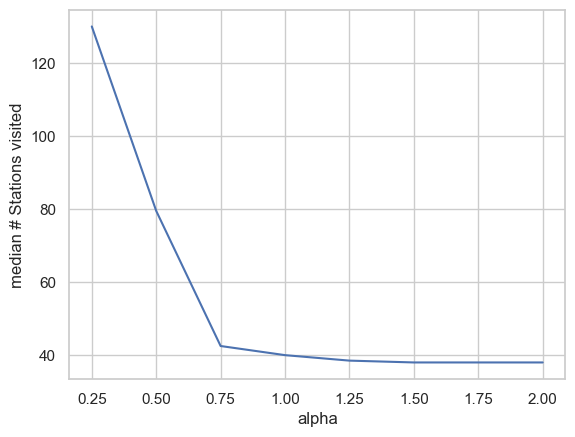

In [28]:
# astar median closize
median_closize_lst = []
for i in alpha_lst:
    median_closize_lst.append(median(astar_closize_lst[f"{i}"]))
sns.lineplot(x=alpha_lst, y=median_closize_lst)
plt.xlabel("alpha")
plt.ylabel("median # Stations visited")
print(median_closize_lst)

[1.0, 1.0, 0.62, 0.525, 0.465, 0.435, 0.42, 0.395]


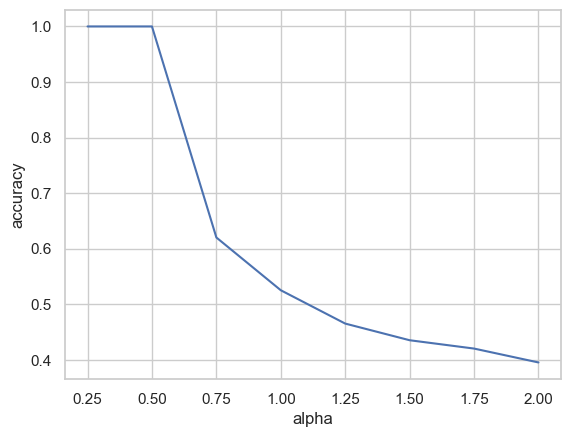

In [29]:
# astar best accuracy
best_accuracy_lst = []
for i in alpha_lst:
    tf = np.array(astar_dis_lst[f"{i}"]) == np.array(diji_dis_lst[f"{i}"])
    tf = np.array(tf)
    best_accuracy_lst.append(sum(tf)/len(tf))
sns.lineplot(x=alpha_lst, y=best_accuracy_lst)
plt.xlabel("alpha")
plt.ylabel("accuracy")
print(best_accuracy_lst)

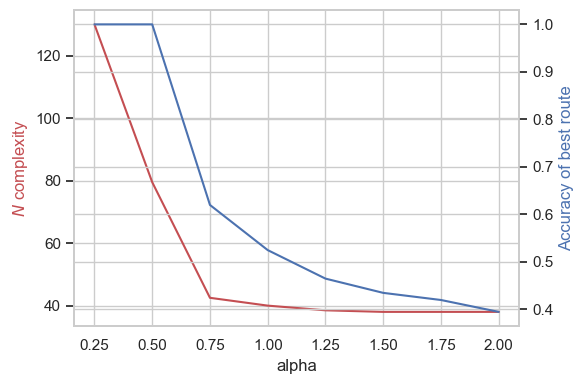

In [38]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax2 = ax1.twinx()
sns.lineplot(x=alpha_lst, y=median_closize_lst, ax=ax1, color='r')
sns.lineplot(x=alpha_lst, y=best_accuracy_lst, ax=ax2, color='b')
ax1.set_xlabel("alpha")
ax1.set_ylabel(f"$N$ complexity", color='r')
ax2.set_ylabel("Accuracy of best route", color='b')
# 解决pdf显示不全的问题
plt.tight_layout()
plt.savefig("./fig/alpha.pdf")